In [32]:
import pandas as pd
import numpy as np
import datetime as DT


import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression as Linear
from bs4 import BeautifulSoup
import urllib
import sys
import numpy as np
import pandas as pd
import matplotlib
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tools import add_constant
from statsmodels.regression.linear_model import RegressionResults
import seaborn as sns
import sklearn as sk
import collections
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tools import add_constant
from statsmodels.regression.linear_model import RegressionResults
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn import tree
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
from sklearn import ensemble
#import pydotplus
#import io
import collections
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.patches as patches

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
reg = pd.read_csv("subset_data.csv", sep="\t")

In [13]:
del reg['Unnamed: 0']
del reg['Unnamed: 0.1']

del reg['general']
### Because if they didnt vote its a 0 in GEN16
del reg['GEN12']
del reg['unamed']

In [21]:
reg.head()

,FIRST_NAME,GEN16,LAST_NAME,district,dob,electiondate,female,id,party,regyear,typeofvote,zip,femaleis1
0,Peter,1.0,Smith,MRT,08/17/1950,11/08/2016,M,111768698,REP,06/13/2000,E,34997,0
1,MELANIE,1.0,HERTL,CLA,01/14/1982,11/08/2016,F,102865764,REP,01/09/2001,Y,32073,1
2,Nigel,0.0,Williams,HIL,05/13/1997,NaN,M,122514241,DEM,05/15/2015,NaN,336124352,0
3,RYAN,1.0,STIMERS,MON,12/01/1974,11/08/2016,M,113936692,NPA,12/18/2001,E,33040,0
4,Benny,1.0,Bennett,BAK,09/06/1965,11/08/2016,M,100592058,REP,11/17/1983,Y,32087,0


In [19]:
print(reg.columns, reg.isnull().sum(axis=0).tolist())

Index(['FIRST_NAME', 'GEN16', 'LAST_NAME', 'district', 'dob', 'electiondate',
       'female', 'id', 'party', 'regyear', 'typeofvote', 'zip'],
      dtype='object') [2, 0, 2, 0, 431, 16297, 10, 0, 0, 0, 16297, 5]


In [ ]:
## 431 DOB are Nan or missing of 100K

In [20]:
reg['femaleis1'] = 0

reg.loc[(reg['female'] == "F"),'femaleis1'] = "1"

In [23]:
datamodel1 = reg

In [24]:
remove = ['FIRST_NAME', 'LAST_NAME', 'dob', 'electiondate',
       'female', 'id', 'regyear', 'typeofvote', 'zip']
        
datamodel1.drop(remove, axis = 1, inplace = True)

In [27]:
datamodel1.head()

,GEN16,district,party,femaleis1
0,1.0,MRT,REP,0
1,1.0,CLA,REP,1
2,0.0,HIL,DEM,0
3,1.0,MON,NPA,0
4,1.0,BAK,REP,0


In [28]:
datamodel1 = pd.get_dummies(datamodel1, columns=['district','party'])

In [29]:
msk = np.random.rand(len(reg)) < 0.5
train = datamodel1[msk]
test = datamodel1[~msk]

y_train = train['GEN16']
y_test = test['GEN16']
X_train = train.drop(['GEN16'], axis = 1)
X_test = test.drop(['GEN16'], axis = 1)

In [40]:
print(np.sum(datamodel1["GEN16"])/len(datamodel1["GEN16"]))

0.83703


In [30]:
datamodel1.columns

Index(['GEN16', 'femaleis1', 'district_ALA', 'district_BAK', 'district_BAY',
       'district_BRA', 'district_BRE', 'district_BRO', 'district_CAL',
       'district_CHA', 'district_CIT', 'district_CLA', 'district_CLL',
       'district_CLM', 'district_DAD', 'district_DES', 'district_DIX',
       'district_DUV', 'district_ESC', 'district_FLA', 'district_FRA',
       'district_GAD', 'district_GIL', 'district_GLA', 'district_GUL',
       'district_HAM', 'district_HAR', 'district_HEN', 'district_HER',
       'district_HIG', 'district_HIL', 'district_HOL', 'district_IND',
       'district_JAC', 'district_JEF', 'district_LAF', 'district_LAK',
       'district_LEE', 'district_LEO', 'district_LEV', 'district_LIB',
       'district_MAD', 'district_MAN', 'district_MON', 'district_MRN',
       'district_MRT', 'district_NAS', 'district_OKA', 'district_OKE',
       'district_ORA', 'district_OSC', 'district_PAL', 'district_PAS',
       'district_PIN', 'district_POL', 'district_PUT', 'district_SAN',


In [33]:
#Log Regression using LRCV
#cross validation values
cvals = [1, 10, 100, 10000, 100000]
logit = LogisticRegressionCV(Cs=cvals, penalty='l2', cv=5, scoring = "roc_auc")
logit.fit(X_train, y_train)
y_hat_train = logit.predict(X_train)
y_hat_test = logit.predict(X_test)
#####

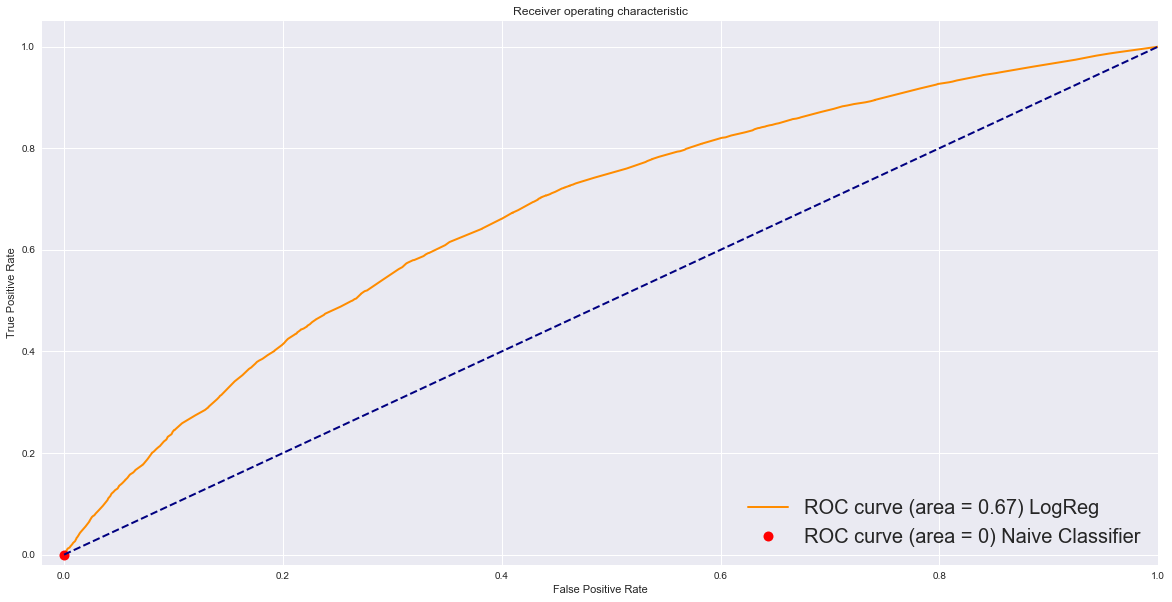

The Area under the curve is very low:  0.6729436982


In [34]:
preds = logit.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test, [0 for y in y_test])
roc_auc_2 = metrics.auc(fpr_2, tpr_2)
plt.figure(figsize=(20,10))
lw = 2
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f) LogReg' % roc_auc)
plt.plot([0], [0], marker='o', markersize=10, lw = 0, color="red", label ='ROC curve (area = 0) Naive Classifier')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([-0.02, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right", prop={'size':20})
plt.show() 
print("The Area under the curve is: " , roc_auc)

In [35]:
pca = PCA()
pca.fit(X_train)
var_c = np.cumsum(pca.explained_variance_ratio_)

n_components_pca = np.sum(var_c<0.9)
print("the first %i components explain %0.3f of variance" % (n_components_pca, var_c[n_components_pca]))
X_train_pca = pca.transform(X_train)[:,:n_components_pca]
X_test_pca = pca.transform(X_test)[:,:n_components_pca]
logregpca = LogisticRegressionCV(Cs=cvals, penalty='l2', cv=5, fit_intercept=True, scoring='roc_auc')
logregpca.fit(X_train_pca, y_train)
y_hat_pca_train = logregpca.predict_proba(X_train_pca)[:,1]
y_hat_pca_test = logregpca.predict_proba(X_test_pca)[:,1] 
##### 


the first 24 components explain 0.900 of variance


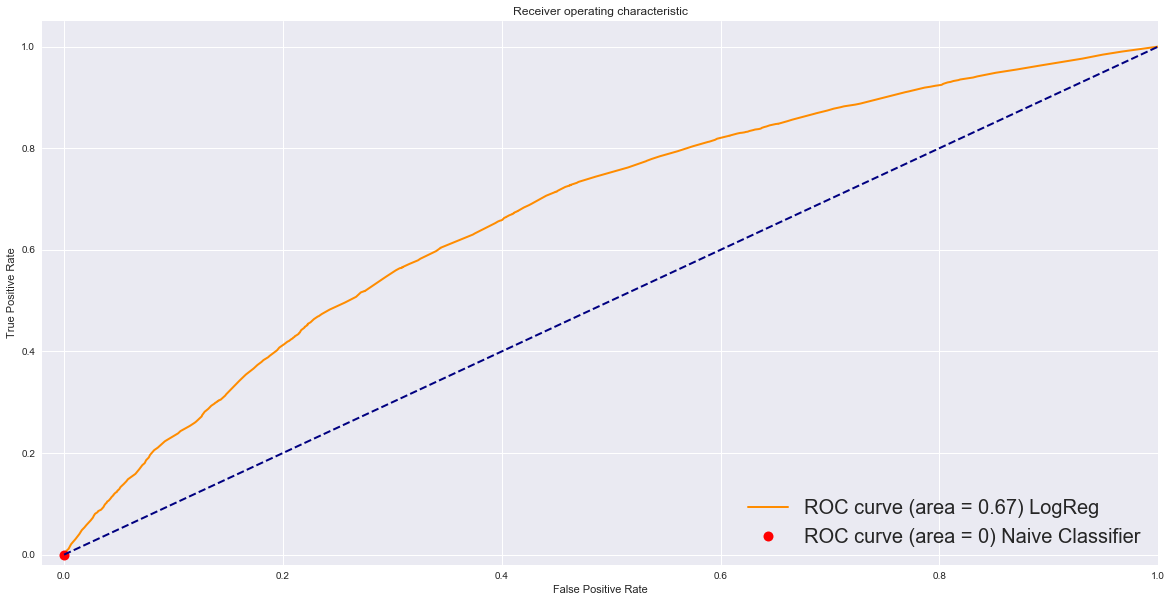

In [36]:
preds = logregpca.predict_proba(X_test_pca)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test, [0 for y in y_test])
roc_auc_2 = metrics.auc(fpr_2, tpr_2)
plt.figure(figsize=(20,10))
lw = 2
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f) LogReg' % roc_auc)
plt.plot([0], [0], marker='o', markersize=10, lw = 0, color="red", label ='ROC curve (area = 0) Naive Classifier')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([-0.02, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right", prop={'size':20})
plt.show() 

### Assumptions of Logistic Regression
Logistic Regression Assumptions

Binary logistic regression requires the dependent variable to be binary.
For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
Only the meaningful variables should be included.
The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
The independent variables are linearly related to the log odds.
Logistic regression requires quite large sample sizes.


Because logistic regression uses MLE rather than OLS, it avoids many
of the typical assumptions tested in statistical analysis.
Does not assume normality of variables (both DV and IVs).
Does not assume linearity between DV and IVs.
Does not assume homoscedasticity.
Does not assume normal errors.
MLE allows more flexibility in the data and analysis because it has
fewer restrictions.